# **Forest Cover Type Prediction using Classification Models**

## **Overview**
This notebook explores various classification techniques to predict forest cover types based on environmental and geographical features. The process involves data loading, cleaning, exploratory data analysis, model training with different algorithms (XGBoost, Random Forest, Decision Tree), hyperparameter tuning, and evaluation.

## Notebook Structure
* [**Library Imports**](#library-imports): Imports essential libraries for data manipulation, visualization, preprocessing, and modeling.
* [**Data Loading, Cleaning, and Splitting**](#data-loading-cleaning-and-splitting): Loads the dataset, cleans the data, and splits it into training, validation, and test sets.
* [**Statistical Summary of Dataset**](#statistical-summary-of-dataset): Generates descriptive statistics for the dataset.
* [**Training XGBoost Classifier with Early Stopping**](#training-xgboost-classifier-with-early-stopping): Trains an XGBoost model with early stopping.
* [**Evaluating XGBoost Model Performance**](#evaluating-xgboost-model-performance): Evaluates the performance of the XGBoost model.
* [**Visualizing XGBoost Feature Importance and Confusion Matrix**](#visualizing-xgboost-feature-importance-and-confusion-matrix): Visualizes feature importance and confusion matrix for XGBoost.
* [**Bonus: Comparing different models and performing hyperparameter tuning**](#bonuscomparing-different-models-and-performing-hyperparameter-tuning)
    * [**Training a Random Forest Classifier**](#training-a-random-forest-classifier): Trains a Random Forest model.
    * [**Random Forest Evaluation**](#random-forest-evaluation): Evaluates the performance of the Random Forest model.
    * [**Decision Tree Training**](#decision-tree-training): Trains a Decision Tree model.
    * [**Decision Tree Evaluation**](#decision-tree-evaluation): Evaluates the performance of the Decision Tree model.
    * [**Compare Model Performance (Accuracy)**](#compare-model-performance-accuracy): Compares the accuracy of the trained models.
    * [**Hyperparameter Tuning with GridSearchCV**](#hyperparameter-tuning-with-gridsearchcv): Performs hyperparameter tuning using GridSearchCV.

##  
  
# **Library Imports**  
This cell loads essential libraries for data manipulation, visualization, preprocessing, and modeling. It includes tools for classification (Decision Trees, Random Forests, XGBoost), regression, scaling, encoding, and performance evaluation — forming a complete ML pipeline foundation.


In [ ]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

##  
  
# **Data Loading, Cleaning, and Splitting**  
This snippet loads the UCI Forest CoverType dataset, extracts features and labels, and adjusts the target to zero-based indexing. It then splits the data into training, validation, and test sets using an 80/20 split followed by a nested 80/20 split on the training set — preparing the data for model development and evaluation.


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/31/data.csv')
df.head()

def clean(data):
  y = data['Cover_Type'] - 1
  X = data.drop('Cover_Type', axis=1)
  return X, y

train_data, y = clean(df)

X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")


X_train: (371847, 54)
X_val: (92962, 54)
X_test: (116203, 54)


##  
  
# **Statistical Summary of Dataset**  
This cell generates descriptive statistics for each numerical feature in the dataset, including count, mean, standard deviation, min, max, and quartiles. It helps identify feature ranges, detect outliers, and understand data distribution before modeling.


In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


##  
  
# **Training XGBoost Classifier with Early Stopping**  
This cell initializes an XGBoost classifier with a high learning rate and 1000 estimators, enabling early stopping to prevent overfitting. The model is trained on the training set and validated on a hold-out set, allowing it to halt training once performance plateaus.


In [ ]:
xgb_model = XGBClassifier(
    n_estimators=300, # ✅ 1000 best but consumes time with minimal change
    learning_rate=0.9,
    verbosity=1,
    random_state=42,
    early_stopping_rounds=10
)
# Subtract 1 from the target variables to make them zero-indexed
xgb_model.fit(X_train, y_train, eval_set = [(X_val, y_val)])

[0]	validation_0-mlogloss:0.83781
[1]	validation_0-mlogloss:0.66709
[2]	validation_0-mlogloss:0.59627
[3]	validation_0-mlogloss:0.54785
[4]	validation_0-mlogloss:0.52067
[5]	validation_0-mlogloss:0.50125
[6]	validation_0-mlogloss:0.48409
[7]	validation_0-mlogloss:0.46494
[8]	validation_0-mlogloss:0.45527
[9]	validation_0-mlogloss:0.44917
[10]	validation_0-mlogloss:0.44263
[11]	validation_0-mlogloss:0.43244
[12]	validation_0-mlogloss:0.41870
[13]	validation_0-mlogloss:0.40788
[14]	validation_0-mlogloss:0.40074
[15]	validation_0-mlogloss:0.39490
[16]	validation_0-mlogloss:0.39081
[17]	validation_0-mlogloss:0.38449
[18]	validation_0-mlogloss:0.38027
[19]	validation_0-mlogloss:0.37341
[20]	validation_0-mlogloss:0.36635
[21]	validation_0-mlogloss:0.36098
[22]	validation_0-mlogloss:0.35581
[23]	validation_0-mlogloss:0.34785
[24]	validation_0-mlogloss:0.34360
[25]	validation_0-mlogloss:0.34073
[26]	validation_0-mlogloss:0.33675
[27]	validation_0-mlogloss:0.33305
[28]	validation_0-mlogloss:0.3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.9, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

##  
  
# **Evaluating XGBoost Model Performance**  
This cell prints accuracy scores for the trained XGBoost classifier across training, validation, and test sets. These metrics help assess model fit, generalization, and potential overfitting by comparing performance on seen and unseen data.


In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}")
print(f"Metrics Validation:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9493
Metrics Validation:
	Accuracy score: 0.9253
Metrics Test:
	Accuracy score: 0.9259


##  
  
# **Visualizing XGBoost Feature Importance and Confusion Matrix**  
This cell defines a function to evaluate model performance by plotting feature importance scores and a confusion matrix. It highlights which features most influence predictions and shows how well the model distinguishes between cover types using true vs. predicted labels.


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_model_performance(model, data, name, X_test, y_test):
  importances = model.feature_importances_
  features = data.columns

  sns.barplot(x=importances, y=features)
  plt.title(f"{name}: Feature Importance Across All Classes")
  plt.xlabel('Importance Score')
  plt.ylabel('Features')
  plt.show()

  cm = confusion_matrix(y_test, model.predict(X_test))
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(f"{name}: Multiclass Confusion Matrix")
  plt.show()

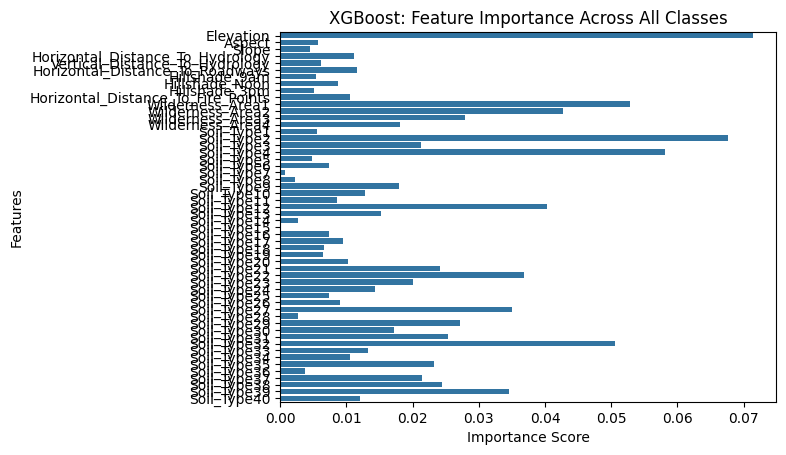

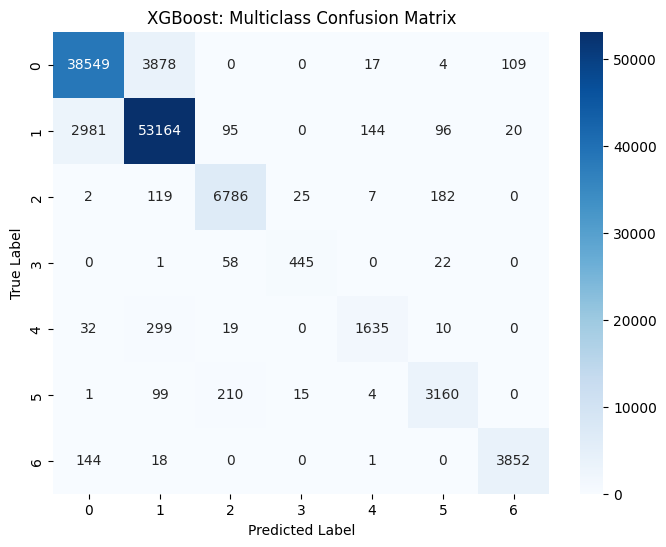

In [ ]:
plot_model_performance(xgb_model, train_data, "XGBoost", X_test, y_test)

#**Bonus:**
###Comparing different models and performing hyperparameter tuning
  ---
#  



## **Training a Random Forest Classifier**  
This cell initializes a Random Forest model with decision trees and fits it to the training data. The ensemble approach helps reduce overfitting and improves predictive accuracy by averaging multiple tree outputs.


In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=300, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}")
print(f"Metrics Validation:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics Validation:
	Accuracy score: 0.9510
Metrics Test:
	Accuracy score: 0.9502


#**Random Forest Evaluation**
Visualizes feature importance and confusion matrix to highlight key predictors and assess classification accuracy.

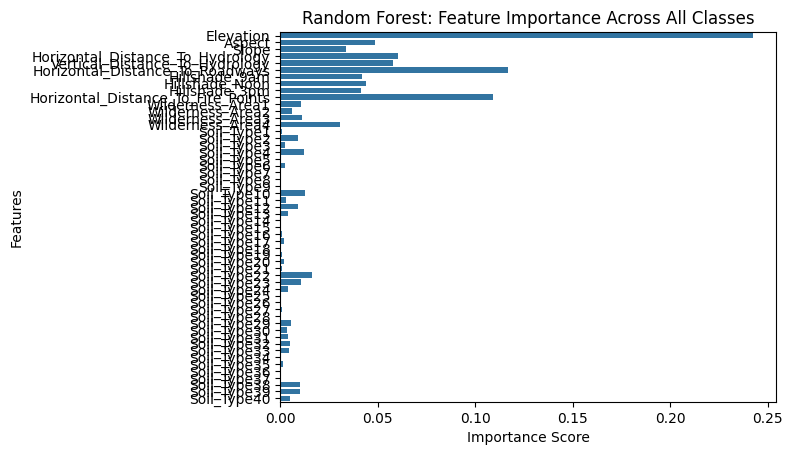

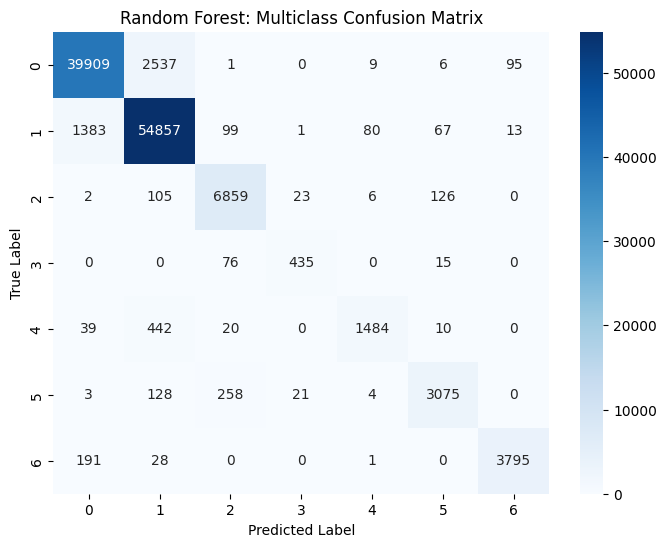

In [ ]:
plot_model_performance(random_forest_model, train_data, "Random Forest", X_test, y_test)


# **Decision Tree Training**
Fits a single decision tree to the training data, capturing decision rules based on feature splits to classify forest cover types.

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics Validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics Validation:
	Accuracy score: 0.9320
Metrics Test:
	Accuracy score: 0.9312


# **Decision Tree Evaluation**
Will use the same function to interpret feature impact and prediction reliability for the DecisionTreeClassifier.



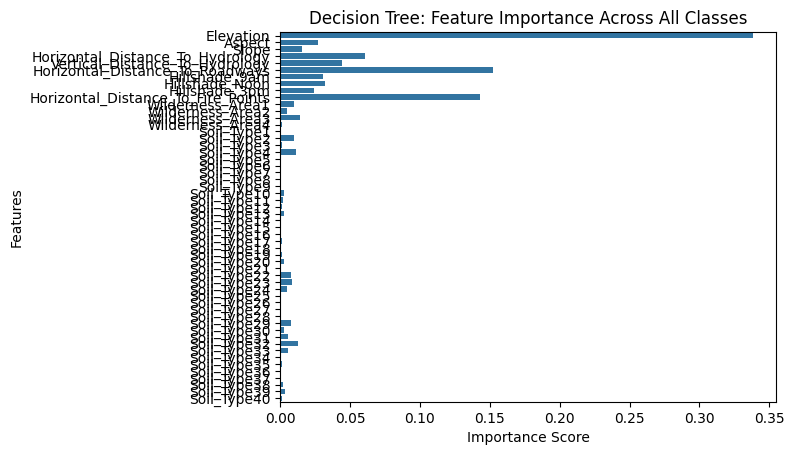

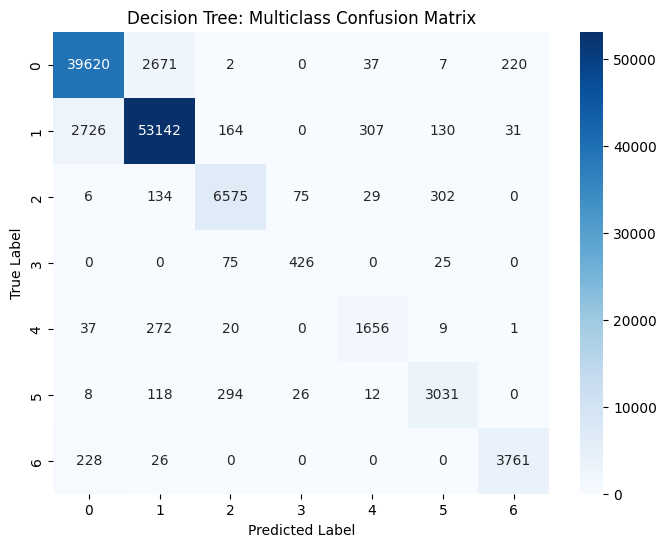

In [ ]:
plot_model_performance(decision_tree_model, train_data, "Decision Tree", X_test, y_test)

# **Compare Model Performance (Accuracy)**


In [ ]:
models = {
    "XGBoost": xgb_model,
    "Random Forest": random_forest_model,
    "Decision Tree": decision_tree_model
}

for name, model in models.items():
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    print(f"{name} Accuracy:")
    print(f"\tTrain: {train_acc:.4f}")
    print(f"\tValidation: {val_acc:.4f}")
    print(f"\tTest: {test_acc:.4f}\n")

XGBoost Accuracy:
	Train: 0.9892
	Validation: 0.9550
	Test: 0.9548

Random Forest Accuracy:
	Train: 1.0000
	Validation: 0.9516
	Test: 0.9512

Decision Tree Accuracy:
	Train: 1.0000
	Validation: 0.9320
	Test: 0.9312



# **Hyperparameter Tuning with GridSearchCV**


In [ ]:
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5]
# }

# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Validation Accuracy:", grid_search.best_score_)

####################33

param_grid = {
    'n_estimators': [30],
    'learning_rate': [0.8, 0.9, 1.0, 1.1],          # test around your current choice
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [0, 1, 5, 10]                # L2 regularization strength
}

xgb = XGBClassifier(
    verbosity=0,
    random_state=42,
    early_stopping_rounds=10
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

print("Best Parameters:", grid_search.best_params_)
print("Best Validation Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 192 candidates, totalling 576 fits
